In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            plot_confusion_matrix) 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

np.random.seed(2121)

In [2]:
train=pd.read_csv('train_eda.csv')
test=pd.read_csv('test_eda.csv')

In [3]:
train.shape

(26728, 28)

In [4]:
train.head()

,outcometype,ageuponoutcome,has_name,is_mix,cat_breed_shorthair,cat_breed_mediumhair,cat_breed_longhair,cat_breed_siamese,dog_breed_chihuahua,dog_breed_pitbull,...,age_old,primary_color_Black,primary_color_Blue,primary_color_Brown,primary_color_Gray,primary_color_Orange,primary_color_Tan,primary_color_Tricolor,primary_color_White,month
0,Return_to_owner,1.00,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Feb
1,Euthanasia,1.00,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Oct
2,Adoption,2.00,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,Jan
3,Transfer,0.06,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,July
4,Transfer,2.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Nov


In [5]:
train.outcometype.value_counts(dropna=False)

Adoption           10769
Transfer            9422
Return_to_owner     4785
Euthanasia          1555
Died                 197
Name: outcometype, dtype: int64

In [6]:
train['outcometype'] = [0 if x == 'Return_to_owner' 
                   else 1 if x == "Euthanasia" 
                   else 2 if x=='Adoption'
                   else 3 if x=='Transfer'
                   else 4 for x in train['outcometype'] ]

In [7]:
['Return_to_owner','Euthanasia','Adoption','Transfer','Died']

['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died']

In [8]:
train.head()

,outcometype,ageuponoutcome,has_name,is_mix,cat_breed_shorthair,cat_breed_mediumhair,cat_breed_longhair,cat_breed_siamese,dog_breed_chihuahua,dog_breed_pitbull,...,age_old,primary_color_Black,primary_color_Blue,primary_color_Brown,primary_color_Gray,primary_color_Orange,primary_color_Tan,primary_color_Tricolor,primary_color_White,month
0,0,1.00,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Feb
1,1,1.00,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Oct
2,2,2.00,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,Jan
3,3,0.06,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,July
4,3,2.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Nov


In [9]:
#To print model scores
def score(model, name, X, y):
    cv = StratifiedKFold(n_splits=10,
                         random_state=42,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv,
                        n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, 
                                              s.mean(), 
                                              2 * s.std()))

In [10]:
def rfscore2(df,target_col,test_size,n_estimators,max_depth):
    '''Gridsearching RandomForest'''
    X = df.drop(target_col, axis=1)   # predictors
    y = df[target_col]                # target
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size = test_size, random_state=42) # TT split
    rf_params = {
             'n_estimators':n_estimators,
             'max_depth':max_depth}   # parameters for grid search
    rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train) # training the random forest with all possible parameters
    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)
    print("best n_estimators:",n_estimators_best)
    best_rf_gs = RandomForestClassifier(max_depth=max_depth_best,n_estimators=n_estimators_best) # instantiate the best model
    
    score(best_rf_gs, 'Random Forest', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
    print('Features and their importance:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X.columns).sort_values().tail(10)
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    return

Fitting 5 folds for each of 110 candidates, totalling 550 fits
GridSearch results
The best parameters on the training data are:
 {'max_depth': 9, 'n_estimators': 25}
best max_depth: 9
best n_estimators: 25
Random Forest Score: 0.65 +- 0.014

Confusion Matrix:

[[ 510    1  554  164    0]
 [  83   38   68  193    0]
 [ 280    1 2295  110    0]
 [ 200   17  657 1459    0]
 [   6    1    8   37    0]]
              precision    recall  f1-score   support

           0       0.47      0.41      0.44      1229
           1       0.66      0.10      0.17       382
           2       0.64      0.85      0.73      2686
           3       0.74      0.63      0.68      2333
           4       0.00      0.00      0.00        52

    accuracy                           0.64      6682
   macro avg       0.50      0.40      0.41      6682
weighted avg       0.64      0.64      0.62      6682

0.6438192158036516
Features and their importance:

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Larry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Larry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Larry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


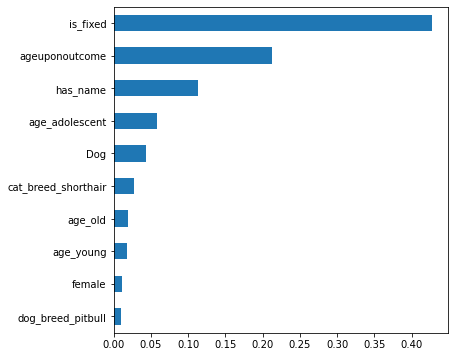

In [11]:
n_estimators = list(range(5,27,2))
max_depth = list(range(1, 21, 2)) 
rfscore2(train.drop(columns= ['month']),'outcometype',0.25,n_estimators,max_depth)

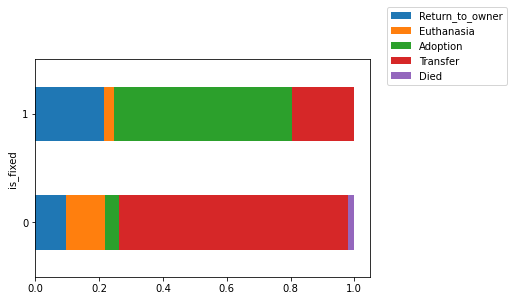

In [12]:
train.groupby('is_fixed').outcometype.value_counts(normalize=True).unstack().plot(kind='barh', stacked=True)
ax = plt.gca()
ax.legend(loc=(1.05,0.88),labels=['Return_to_owner','Euthanasia','Adoption','Transfer','Died'])

Animals that were not spayed or neutered were transferred at a much greater rate than their counterparts. Shelters that do not have the money or resources to perform these on site will transfer their animals to those that do.

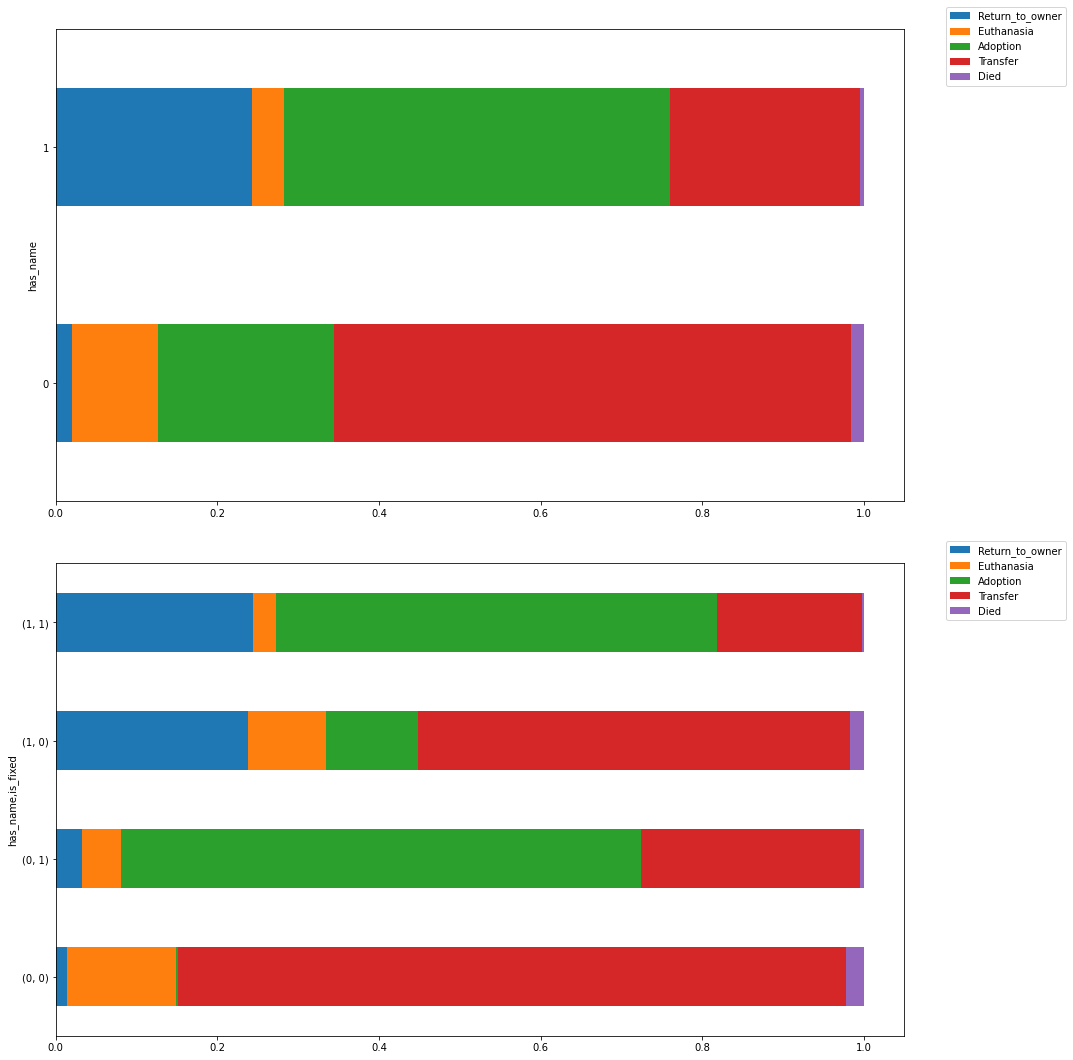

In [13]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
train.groupby('has_name').outcometype.value_counts(normalize=True).unstack().plot(kind='barh', stacked=True, ax=ax[0])
ax[0].legend(loc=(1.05,0.88),labels=['Return_to_owner','Euthanasia','Adoption','Transfer','Died'])

train.groupby(['has_name','is_fixed']).outcometype.value_counts(normalize=True).unstack().plot(kind='barh', stacked=True, ax=ax[1])
ax[1].legend(loc=(1.05,0.88),labels=['Return_to_owner','Euthanasia','Adoption','Transfer','Died'])


plt.tight_layout()

It would seem that Adoption is much higher for animals that have a name, but it doesn't matter as much as it looks when taken into account with is_fixed

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [15]:
def knnscore_gridsearch(df, target_col, test_size):
    '''Gridsearching for KNeighbors Classifier'''
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    ss= StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size = test_size, random_state=42) # train/test split
    knn_params= {'n_neighbors': list(range(1, 30, 2)), 'p':[1,2]}
    X_train_sc=ss.fit_transform(X_train)
    X_test_sc= ss.transform(X_test)
    knn_gs = GridSearchCV(KNeighborsClassifier(),knn_params, cv=5, verbose=1,n_jobs=-1)
    knn_gs.fit(X_train_sc, y_train)
    print('GridSearch results')
    print('The best parameters on the training data are:\n') # printing the best parameters
    n_neighbors_best = knn_gs.best_params_['n_neighbors']      # getting the best n_neighbors
    p_best = knn_gs.best_params_['p'] # printing best p
    print("best n_neighbors:",n_neighbors_best)
    print("best p:", p_best)
    
    best_knn_gs = KNeighborsClassifier(n_neighbors=n_neighbors_best,p=p_best) # instantiate the best model
    best_knn_gs.fit(X_train_sc,y_train)  # fitting the best model
    best_knn_score = best_knn_gs.score(X_test_sc,y_test) 
    print ("best score is:",round(best_knn_score,2))
    
    preds = best_knn_gs.predict(X_test_sc)
    print("")


    disp = plot_confusion_matrix(best_knn_gs, X_test_sc, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    print("Confusion matrix:\n%s" % disp.confusion_matrix)
    plt.show();


Fitting 5 folds for each of 30 candidates, totalling 150 fits
GridSearch results
The best parameters on the training data are:

best n_neighbors: 19
best p: 1
best score is: 0.61



C:\Users\Larry\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[ 532    7  574  116    0]
 [ 117    8   80  177    0]
 [ 344    4 2180  158    0]
 [ 265   14  691 1363    0]
 [   5    0    9   38    0]]


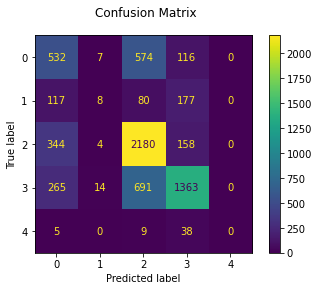

In [16]:
knnscore_gridsearch(train.drop(columns= ['month']),'outcometype',0.25)
